## Assignment 3
# Twitter Trend Decy - An analysis of the declining trend of #EgyptAir

### Nina Bartmann (517260)    
### Joelle Duff (361872)    
### Irene Laureijs (508695)  

![alt text](https://marketing-insider.eu/wp-content/uploads/2015/08/Using-Social-Media-in-Marketing.jpg)

# RESEARCH QUESTION
<br> How long does it take for the Twitter trend #EgyptAir to disappear?

# MOTIVATION & INTRODUCTION
<br> Social Media – a phenomenon of the 21st century. To some it is a red flag, but to most it represents an opportunity to engage in communication and to exchange information. Social media platforms include the social network [Facebook](https://en.wikipedia.org/wiki/Facebook), the video-sharing website [YouTube](https://www.youtube.com), the networking service [LinkedIn](https://en.wikipedia.org/wiki/LinkedIn), the mobile photo-sharing service [Instagram](https://www.instagram.com) or the microblogging service Twitter. Social media enables participants of its services or networks to simultaneously be producer, distributor and consumer of information. This means that users of social media engage in a flow of information on a scale and at a speed that were previously not possible. 

Within seconds of their occurrence, many news events become extremely popular among social media participants. This is especially visible in relation to disaster news, such as the terror attacks in Paris and [Brussels](http://www.bbc.com/news/blogs-trending-35872170). The intense media coverage right after the attacks captured our interest. People around the world shared their views and expressed solidarity with the victims and their families. 

Given the constant flow of information, social media participants are likely to exhibit a limited attention span towards a single topic and are more prone to the symptom of “Quick News”. Hence, we are interested as to how quickly trends in social media can disappear again.

We will investigate and predict how long it will take for the trend in the Twitter hash tag #EgyptAir to disappear. The hash tag refers to an Egypt Air flight, which was hijacked on March 29, 2016 and forced to divert to Cyprus instead of Cairo International Airport. 

## What is Twitter? ![alt text](http://www.cambridgema.gov/images/twitter-icon.png)
<br> Twitter is an online microblogging service, which enables users to send and read short 140-character messages called “tweets”. Each user chooses to follow certain other users and their “tweets” about news, personal information or links to content such as images, video or articles. Has tags “#” are used to group posts together by a certain topic. “As of May 2915, Twitter has more than 500 million users, out of which more than 332 million are active.” (see: <https://en.wikipedia.org/wiki/Twitter>)

## METHOD

*Twitter data mining and resulting data points* 

For this assignment we were able to mine [data](# IMPORTING DATA) from Twitter at several points in time. We found the trend #EgyptAir to be trending that day, so we analysed the frequency of mentioning this hash tag (and similar ones) at multiple time periods. Furthermore, we predicted the decay in the frequency of the hash tah #EgyptAir by employing a [**linear**](# MODELS) as well as an [**exponential**](# MODELS) decay model.

## PRELIMINARY ANSWERS 
Our [conclusion](#CONCLUSION) is that ... Assuming that ..., the answer to our research question is ...

# IMPORTING DATA
The following steps were taken to get the data we needed from Twitter:

**Step 1**: Import the real-time data from Twitter

In [ ]:
# This command tells python to import data from Twitter, using the package twitter and our personal token codes. 
import twitter

consumer_key = 'qwciG2GP5XcIu66v2xjW1HMzX'
consumer_secret = '8Bzy3ve28bErN3YTvCMdeiKSJsTF49Vo6I0SZIUoKorbMCUzsx'
oauth_token = '2456869753-S4bVmPGl7rhunfPMClCCCHpKgBUQFUbdU4fxrBP'
oauth_token_secret = 'nZwv5JjI8Pc5jfZbYujQGZdZ9baZISE4JKQAGtfjYgR4q'

auth = twitter.oauth.OAuth(oauth_token, oauth_token_secret, consumer_key, consumer_secret)
twitter_api = twitter.Twitter(auth=auth)

print (twitter_api)

**Step 2** : Create variables to find twitter users location

In [ ]:
# We then went on to creating variables to find the twitter users location ID. We did this for the world and for the US.
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print (world_trends)
print
print (us_trends)

**Step 3** : Convert the data using the *json* package

In [ ]:
# The next step is to import the package json. JSON (JavaScript Object Notation) is a compact, text based format for computers 
# to exchange data. 
import json

print (json.dumps(world_trends, indent=1))
print
print (json.dumps(us_trends, indent=1))

**Step 4** : Show common Twitter trends in the US and the World

In [ ]:
# We then show the common trends in the US and the World on Twitter
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print (common_trends)

**Step 5** : Focus on the twitter trend *#EgyptAir*

In [ ]:
# We can now look for the trending topic, #EgyptAir

q = '#EgyptAir' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']
# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print ("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e:
        break
        
# Create a dictionary from next_results, which has the following form:
# ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print (json.dumps(statuses[0], indent=1))

**Step 6** : Search for the hashtag *#EgyptAir* in status texts, screennames, and hashtags

In [ ]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1))
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

**Step 7** : Find the frequency of *#EgyptAir* in the Twitter statusses, screennames, and hashtags

In [ ]:
# We count the observations of #EgyptAir by doing the following
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10
    print

**Step 8** : Finally, present the frequencies in a table

In [ ]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

Now that we have been able to find the trending topic #EgyptAir and other related hashtags for different periods of time, we can merge the data into one table. Below you will see a table which includes the top 10 trending hastags within the topic EgyptAir, at three different time periods. *Time 0, Time 1, and Time 2* correspond to Tuesday 29 March at 16.00, 19.00, and 23.00 respectively. On Friday 1 April, at 14.00 we anaylsed the data again, and called it *Time 3*. Finally, *Time 4* represents the most recent time period on Tuesday 4 April at 18.00, when we did our final analysis. Including these last two varibles will help us check the validity of our estimated models.

In [28]:
# We use the package Pandas to create the tables below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

In [29]:
data = {'Time 0': ['EgyptAir', 'Egyptair', 'SelfiesOutOfControl', 'CBC', 'EgyptAirHijack', 'MS181', 'egyptair', 'weightloss'], 
        'Frequency 0': [185, 14, 5, 5, 5, 5, 1, 1],
        'Time 1' : ['EgyptAir', 'EgyptAirHijack', 'Egypt', 'LoveIsInTheAir', 'MS181', 'medias', 'HijackedPlane', 'Cipro'],
        'Frequency 1': [80, 5, 3, 2, 2, 1, 1, 1],
        'Time 2': ['EgyptAir', 'MS181', 'EgyptAirHijack', 'SriLanka', 'inspiration', 'TPMP', 'sbbservicescout', 'AlliAbajo7'],
        'Frequency 2': [62, 2, 2, 1, 1, 1, 1, 1],
        'Time 3': ['EgyptAir', 'Selfies', 'therepost', 'MS181', 'Cyprus', 'ShayGiven', '-', '-'], 
        'Frequency 3': [137, 4, 4, 4, 3, 2, '-', '-'], 
        'Time 4': ['EgyptAir', 'TrailerJamShow', 'Egyptair', 'USMNT', 'FirstDates', 'AUSvJOR', '-', '-'],
        'Frequency 4': [89, 14, 8, 1, 1, 1, '-', '-']}
EgyptAirCountTotal = pd.DataFrame(data, columns=['Time 0', 'Frequency 0', 'Time 1', 'Frequency 1', 'Time 2', 'Frequency 2', 
                                                 'Time 3', 'Frequency 3', 'Time 4', 'Frequency 4']) 
EgyptAirCountTotal

,Time 0,Frequency 0,Time 1,Frequency 1,Time 2,Frequency 2,Time 3,Frequency 3,Time 4,Frequency 4
0,EgyptAir,185,EgyptAir,80,EgyptAir,62,EgyptAir,137,EgyptAir,89
1,Egyptair,14,EgyptAirHijack,5,MS181,2,Selfies,4,TrailerJamShow,14
2,SelfiesOutOfControl,5,Egypt,3,EgyptAirHijack,2,therepost,4,Egyptair,8
3,CBC,5,LoveIsInTheAir,2,SriLanka,1,MS181,4,USMNT,1
4,EgyptAirHijack,5,MS181,2,inspiration,1,Cyprus,3,FirstDates,1
5,MS181,5,medias,1,TPMP,1,ShayGiven,2,AUSvJOR,1
6,egyptair,1,HijackedPlane,1,sbbservicescout,1,-,-,-,-
7,weightloss,1,Cipro,1,AlliAbajo7,1,-,-,-,-


The following table shows the hashtags that are present in all time periods, with their corresponding frequencies in *Time 0, Time 1, and Time 2*.

In [30]:
# This table shows the frequencies of #EgyptAir from Time 0 to Time 4
data = {'EgyptAir': [185, 80, 62, 137, 89]}
EgyptAirCountTime = pd.DataFrame(data, columns=['EgyptAir']) 
EgyptAirCountTime

,EgyptAir
0,185
1,80
2,62
3,137
4,89


In [32]:
# This table shows the frequencies of #EgyptAirHijack from Time 0 to Time 2
data = {'EgyptAirHijack': [5, 5, 2]}
EgyptAirHijackCountTime = pd.DataFrame(data, columns=['EgyptAirHijack']) 
EgyptAirHijackCountTime

,EgyptAirHijack
0,5
1,5
2,2


The graphs below show the declining trend in frequencies for the hashtags **#EgyptAir** and **#EgyptAirHijack**

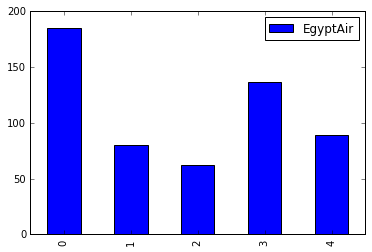

In [33]:
my_plot = EgyptAirCountTime.plot(kind='bar')

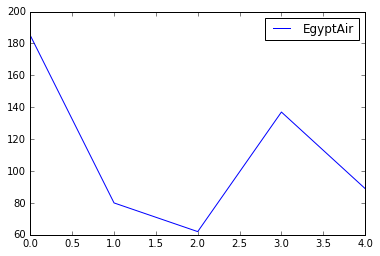

In [34]:
my_plot = EgyptAirCountTime.plot(kind='line')

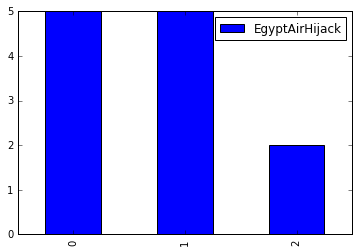

In [35]:
my_plot = EgyptAirHijackCountTime.plot(kind='bar')

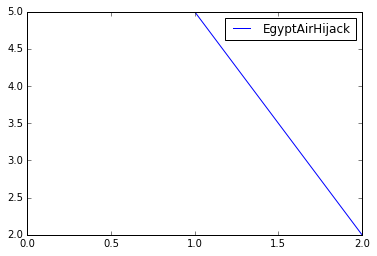

In [36]:
my_plot = EgyptAirHijackCountTime.plot(kind='line')

# MODELS

We now want to find a model which fits our graph best. We consider using a **linear** or an **exponential** decay function, as shown in the image below. 

!["Linear vs Exponential Decay"](exp_linear.jpg)

- **Linear** decay shows a constant declining relationship between two variables. In this case we would see a constant declining relationship between *time* on the x-axis and *frequency* on the y-axis. The function for the linear decay model $$y = f(x) = a - bx$$  may be used as as simple declining model where $α < 0$ . A linear function has one independent variable and one dependent variable. The independent variable is x and the dependent variable is y. The constant term or the y-intercept is $a$, and it is the value of the dependent variable when x = 0. The coefficient of the independent variable, $b$ , is the slope of the function and gives the constant rate of change of the dependent variable. 


- **Exponential** decay shows a relative declining relationship between two variables. In this case we would see a relative declining relationship between *time* on the x-axis and *frequency* on the y-axis. Exponential decay models decrease very rapidly, and then level off to become asymptotic towards the x-axis. If you know the initial value then the rest of the model is fairly easy to complete. In this case the initial value is the amount of frequencies at *time 0*. The function for the exponential decay model is $$y = f(x) = ab^{x}$$  where $a > 0$  and $0 < b < 1$ . The variable $a$ is the y-intercept, and $b$ will be the rate of decline, in time x (where x = 0,1,2,3,4). Different values are available for the rate of decline, as long as they are between 0 and 1. The closer the value is to 1, the steeper the rate of decline.  


https://people.richland.edu/james/lecture/m116/logs/models.html

http://www.math.utah.edu/~jasonu/1030/Files/Chap8.pdf

http://www.regentsprep.org/regents/math/algebra/ae7/expdecayl.htm


# ASSUMPTIONS

We made the following assumptions and decisions when creating fitting models:
- There are no new information regarding #EgyptAir available which could make the hash tag trend again at a later point in time 
- Time periods are space out equally
- The decay will happen within a short period of time, such as a few days

# RESULTS

Given the information we have for the three time periods, we can fill in the linear and exponential functions, and compare these with our own findings. We use *Time 0* as the time at *t=0* and therefore as the constant, or intercept. 

- **Linear** Based on the the two tables we made earlier, we can create functions which give us the frequencies for both #EgyptAir and #EgyptAirHijack. The following two functions represent this linear relationship and were calculated based on the results from *Time 0* and *Time 2* 
$$ y_{EgyptAir} = 185 - 61.5x $$ 
$$ y_{EgyptAirHijack} = 5 - 1.5x$$

- **Exponential** Also based on the two tables we made earlier, we were able to create exponential functions for both #EgyptAir and #EgyptAirHijack. The following functions represent this exponentional relationship and were calculated on the basis of..
$$ y_{EgyptAir} = 185*0.75^x $$
$$ y_{EgyptAirHijack} = 5*0.8^x $$

In [43]:
# The following table shows the values for a and b for both models. Other values for b are possible too.....

data = {'EgyptAir': ['Linear', 'Exponential'],
        'a': [185, 185],
        'b': [61.5, 0.75]}
EgyptAirCountModel = pd.DataFrame(data, columns=['EgyptAir', 'a', 'b']) 
EgyptAirCountModel

,EgyptAir,a,b
0,Linear,185,61.50
1,Exponential,185,0.75


In [44]:
data = {'EgyptAirHijack': ['Linear', 'Exponential'],
        'a': [5, 5],
        'b': [1.5, 0.8]}
EgyptAirHijackCountModel = pd.DataFrame(data, columns=['EgyptAirHijack', 'a', 'b']) 
EgyptAirHijackCountModel

,EgyptAirHijack,a,b
0,Linear,5,1.5
1,Exponential,5,0.8


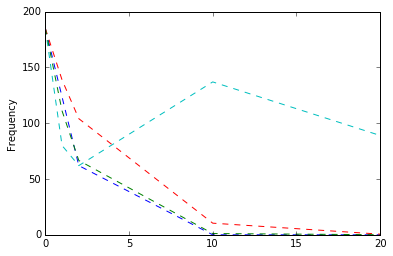

In [90]:
import matplotlib.pyplot as plt
plt.plot([0,1,2,10,20], [185,80,62,137,89], '--', color='c')
plt.plot([0,1,2,10,20], [185,123.5,62,0,0], '--', color='b')
plt.plot([0,1,2,10,20], [185,138.75,104.06,10.42,0.587], '--', color='r')
plt.plot([0,1,2,10,20], [185,111,66.6,1.12,0.068], '--', color='g')
plt.ylabel('Frequency')
plt.axis([0, 20, 0, 200])
plt.show()

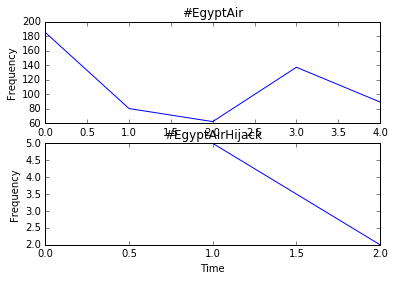

In [68]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([0,1,2,3,4], [185,80,62,137,89])
plt.title('#EgyptAir')
plt.ylabel('Frequency')
plt.xlabel('Time')

plt.subplot(212)             # the second subplot in the first figure
plt.plot([0,1,2], [5,5,2])
plt.title('#EgyptAirHijack')
plt.ylabel('Frequency')
plt.xlabel('Time')

# LIMITATIONS
- We don't have enough data to make credible predictions about the development of #EgyptAir
- Our model does not allow for sudden peaks once the decay has started. This means, we assume that the trend is steadily declining

# CONCLUSION